# HW3: Occupation Dataset

### Introduction:

Special thanks to: https://github.com/guipsamora for sharing his datasets, materials, and questions.

- https://github.com/justmarkham for sharing the dataset and materials.


In [1]:
### Step 0a. Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [180]:
### Step 0b. Import the dataset from this address. https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user
### Step 0c. Assign it to a variable called users and use the 'user_id' as index
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')

In [3]:
# Step 1. See the first 5 entries
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [4]:
# Step 2. How many observations and columns are in the data?
users.shape

(943, 4)

In [5]:
# Step 3. How many different occupations there are in this dataset?
users.occupation.nunique()

21

In [6]:
# Step 4. What is the most frequent occupation?
users.occupation.value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

In [17]:
# Step 5. Discover what is the mean age per occupation.
# Sort the results and find the 3 occupations with the lowest mean age and the 3 with the highest
print(users.age.groupby(users.occupation).mean().sort_values(ascending=True)[0:3])
print(users.age.groupby(users.occupation).mean().sort_values(ascending=False)[0:3])


occupation
student          22.081633
none             26.555556
entertainment    29.222222
Name: age, dtype: float64
occupation
retired     63.071429
doctor      43.571429
educator    42.010526
Name: age, dtype: float64


In [18]:
# Step 6. Find the proportion of males by occupation and sort it from the most to the least
print((users.loc[users.gender=='M','occupation'].value_counts()/users.occupation.value_counts()).sort_values(ascending=False))

doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: occupation, dtype: float64


In [19]:
# Step 7. For each occupation, calculate the minimum and maximum ages
# See groupby and agg() to perform multiple aggregate functions at once
users['age'].groupby(users['occupation']).aggregate(['max','min'])


,max,min
occupation,,
administrator,70,21
artist,48,19
doctor,64,28
educator,63,23
engineer,70,22
entertainment,50,15
executive,69,22
healthcare,62,22
homemaker,50,20


In [20]:
# Step 8. For each combination of occupation and gender, calculate the mean age.
# Arrange the results in a table so each row is an occupation, and you have a 
# column of the average male age and another column with the average female age.
# Sort the resulting table by Female mean age from least to greatest
users.age.groupby([users.occupation,users.gender]).aggregate(['mean']).unstack().sort_values([('mean','F')],ascending=True)



mean           
gender                 F          M
occupation                         
student        20.750000  22.669118
salesman       27.000000  38.555556
scientist      28.333333  36.321429
engineer       29.500000  36.600000
artist         30.307692  32.333333
entertainment  31.000000  29.000000
programmer     32.166667  33.216667
homemaker      34.166667  23.000000
other          35.472222  34.028986
none           36.500000  18.600000
marketing      37.200000  37.875000
writer         37.631579  35.346154
technician     38.000000  32.961538
educator       39.115385  43.101449
lawyer         39.500000  36.200000
healthcare     39.818182  45.400000
librarian      40.000000  40.000000
administrator  40.638889  37.162791
executive      44.000000  38.172414
retired        70.000000  62.538462
doctor               NaN  43.571429

In [21]:
# Step 9. For each occupation find the count of women and men
# Arrange the results in a table so each row is an occupation, similar to above
#users.groupby(users.occupation)[users.gender].count()
users.occupation.groupby([users.occupation,users.gender]).aggregate(['count']).unstack()


count       
gender            F      M
occupation                
administrator  36.0   43.0
artist         13.0   15.0
doctor          NaN    7.0
educator       26.0   69.0
engineer        2.0   65.0
entertainment   2.0   16.0
executive       3.0   29.0
healthcare     11.0    5.0
homemaker       6.0    1.0
lawyer          2.0   10.0
librarian      29.0   22.0
marketing      10.0   16.0
none            4.0    5.0
other          36.0   69.0
programmer      6.0   60.0
retired         1.0   13.0
salesman        3.0    9.0
scientist       3.0   28.0
student        60.0  136.0
technician      1.0   26.0
writer         19.0   26.0

In [41]:
# Step 10. Turn the counts above into proportions. e.g administrator 0.455696 0.544304
# Arrange results in increasing order of proportion men
output=users.occupation.groupby([users.occupation,users.gender]).aggregate(['count']).unstack()
output=output.div(output.sum(axis=1),axis=0)
print(output)

                  count          
gender                F         M
occupation                       
administrator  0.455696  0.544304
artist         0.464286  0.535714
doctor              NaN  1.000000
educator       0.273684  0.726316
engineer       0.029851  0.970149
entertainment  0.111111  0.888889
executive      0.093750  0.906250
healthcare     0.687500  0.312500
homemaker      0.857143  0.142857
lawyer         0.166667  0.833333
librarian      0.568627  0.431373
marketing      0.384615  0.615385
none           0.444444  0.555556
other          0.342857  0.657143
programmer     0.090909  0.909091
retired        0.071429  0.928571
salesman       0.250000  0.750000
scientist      0.096774  0.903226
student        0.306122  0.693878
technician     0.037037  0.962963
writer         0.422222  0.577778


                  count          
gender                F         M
occupation                       
administrator  0.455696  0.544304
artist         0.464286  0.535714
doctor              NaN  1.000000
educator       0.273684  0.726316
engineer       0.029851  0.970149
entertainment  0.111111  0.888889
executive      0.093750  0.906250
healthcare     0.687500  0.312500
homemaker      0.857143  0.142857
lawyer         0.166667  0.833333
librarian      0.568627  0.431373
marketing      0.384615  0.615385
none           0.444444  0.555556
other          0.342857  0.657143
programmer     0.090909  0.909091
retired        0.071429  0.928571
salesman       0.250000  0.750000
scientist      0.096774  0.903226
student        0.306122  0.693878
technician     0.037037  0.962963
writer         0.422222  0.577778


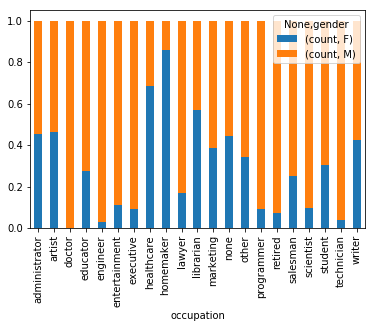

In [62]:
# Create a stacked barchart showing the results above
data=output
print(data)
data.plot(kind='bar',stacked=True)

In [196]:
# Extract the first digit of each zip code 
# and create a new column called 'region' that maps the
# first digit of the zip to new values using this dictionary:
d = {'0': 'New England',
'1': 'Mid-Atlantic',
'2': 'Central East Coast',
'3': 'The South',
'4': 'Midwest',
'5': 'Northern Great Plains',
'6': 'Central Great Plains',
'7': 'Southern Central',
'8': 'Mountain Desert',
'9': 'West Coast'} 

# print the first 5 rows of the result
type(users)
zipped=users.loc[:,'zip_code']
result=[zipped[i][0] for i in range(1,len(zipped))]

#print(result[0])
#print(d[result[0]])

region=[];
for i in range(0,len(result)):
    if(result[i].isdigit()):
         region.append(d[result[i]])

region=pd.DataFrame(data=region,columns=['Region'])
region.index+=1

users=pd.concat([users,region],axis=1)

print(users.iloc[0:5,])

   age gender  occupation zip_code           Region
1   24      M  technician    85711  Mountain Desert
2   53      F       other    94043       West Coast
3   23      M      writer    32067        The South
4   24      M  technician    43537          Midwest
5   33      F       other    15213     Mid-Atlantic


In [203]:
''# for the occuptation 'retired', find the mean age of each region
users.age.loc[users.occupation=='retired',].groupby(users.Region).mean()


Region
Central East Coast       60.0
Central Great Plains     56.0
Mid-Atlantic             65.0
Midwest                  64.0
New England              62.5
Northern Great Plains    65.0
The South                65.0
West Coast               66.0
Name: age, dtype: float64

,age,gender,occupation,zip_code,Region
106,61,M,retired,55125,Central Great Plains
234,60,M,retired,94702,Midwest
308,60,M,retired,95076,New England
318,65,M,retired,06518,Northern Great Plains
349,68,M,retired,61455,Midwest
480,57,M,retired,98257,West Coast
481,73,M,retired,37771,West Coast
564,65,M,retired,94591,New England
573,68,M,retired,48911,West Coast
644,51,M,retired,63645,Central Great Plains
